<a href="https://colab.research.google.com/github/B97/Time-Series-Challenge/blob/main/Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
import pandas as pd
import numpy as np
import matplotlib as plt
plt.rcParams["figure.figsize"] = (20, 10)
import datetime
from sklearn.metrics import mean_squared_error

In [1]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [177]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [178]:
df['day'] = pd.to_datetime(df['day'])
df.index = df.day
df = df.drop(columns = ['day'])
df = df.drop(columns=['Unnamed: 0'])
df.head(10)

,item_number,item_name,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue
day,,,,,,,
2022-02-09,80317483,ROMA TOMATEN ES I 500G SF,0.92,1.49,0.0,16.0,23.55
2022-02-09,80317483,ROMA TOMATEN ES I 500G SF,0.92,1.49,0.0,16.0,23.55
2022-02-09,80101923,SL MANDARINEN BEH.ES I 750G GS,2.05,3.49,0.0,3.0,10.47
2022-02-09,80101923,SL MANDARINEN BEH.ES I 750G GS,2.05,3.49,0.0,3.0,10.47
2022-02-09,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.64,0.99,0.0,13.0,12.84
2022-02-09,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.64,0.99,0.0,13.0,12.84
2022-02-08,80317483,ROMA TOMATEN ES I 500G SF,0.92,1.49,10.0,14.0,20.71
2022-02-08,80317483,ROMA TOMATEN ES I 500G SF,0.92,1.49,10.0,14.0,20.71
2022-02-08,80101923,SL MANDARINEN BEH.ES I 750G GS,2.05,3.49,0.0,3.0,9.89


In [179]:
df.dtypes

item_number                 int64
item_name                  object
purchase_price            float64
suggested_retail_price    float64
orders_quantity           float64
sales_quantity            float64
revenue                   float64
dtype: object

In [180]:
df.describe()

,item_number,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue
count,1.878000e+03,1878.000000,1878.000000,1878.000000,1878.000000,926.000000
mean,8.014925e+07,1.216796,1.941402,8.602769,8.235357,21.207775
std,1.227237e+05,0.568129,0.936656,14.981958,11.510945,13.069028
min,8.002835e+07,0.520000,0.660000,0.000000,0.000000,1.490000
25%,8.002835e+07,0.674928,1.055314,0.000000,0.000000,12.847500
50%,8.010192e+07,0.978451,1.546338,0.000000,0.000000,19.220000
75%,8.031748e+07,1.991321,3.216415,18.000000,15.000000,27.430000
max,8.031748e+07,2.150000,3.490000,144.000000,85.000000,93.520000


In [181]:
df = df.drop_duplicates()

In [182]:
df.shape

(448, 7)

In [183]:
df.item_number.value_counts()

80028349    241
80317483    170
80101923     37
Name: item_number, dtype: int64

In [184]:
df1 = df[df['item_number'] == 80101923]

In [185]:
df.loc[df['sales_quantity'] == 0, 'revenue'] = 0

In [186]:
df.sample(10)

,item_number,item_name,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue
day,,,,,,,
2021-12-14,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.640000,0.990000,0.0,13.0,12.87
2022-01-22,80101923,SL MANDARINEN BEH.ES I 750G GS,2.150000,3.490000,0.0,1.0,3.49
2021-07-21,80028349,UH ZWIEBELN DE-HE I 1KG GS,1.090000,1.790000,0.0,4.0,7.16
2022-01-12,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.630000,0.990000,18.0,14.0,13.72
2022-01-26,80317483,ROMA TOMATEN ES I 500G SF,0.920000,1.490000,20.0,9.0,13.41
2021-06-09,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.674928,1.055314,0.0,11.0,21.73
2021-12-27,80317483,ROMA TOMATEN ES I 500G SF,0.960000,1.490000,0.0,16.0,23.84
2021-10-21,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.630000,0.990000,18.0,31.0,30.47
2021-04-26,80317483,ROMA TOMATEN ES I 500G SF,0.978451,1.546338,20.0,0.0,0.00


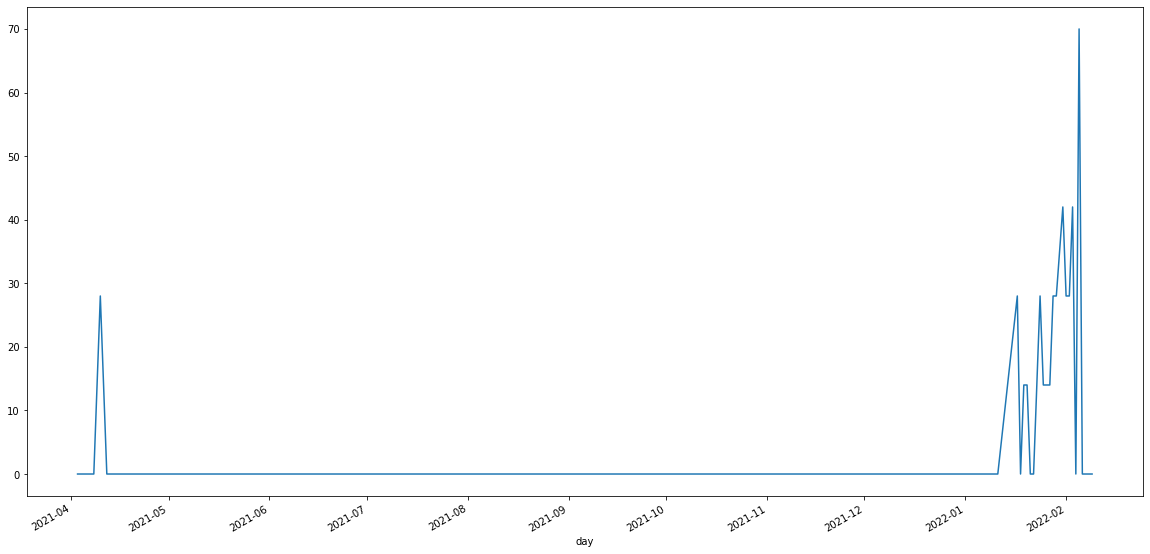

In [187]:
df[df['item_number'] == 80101923].orders_quantity.plot()

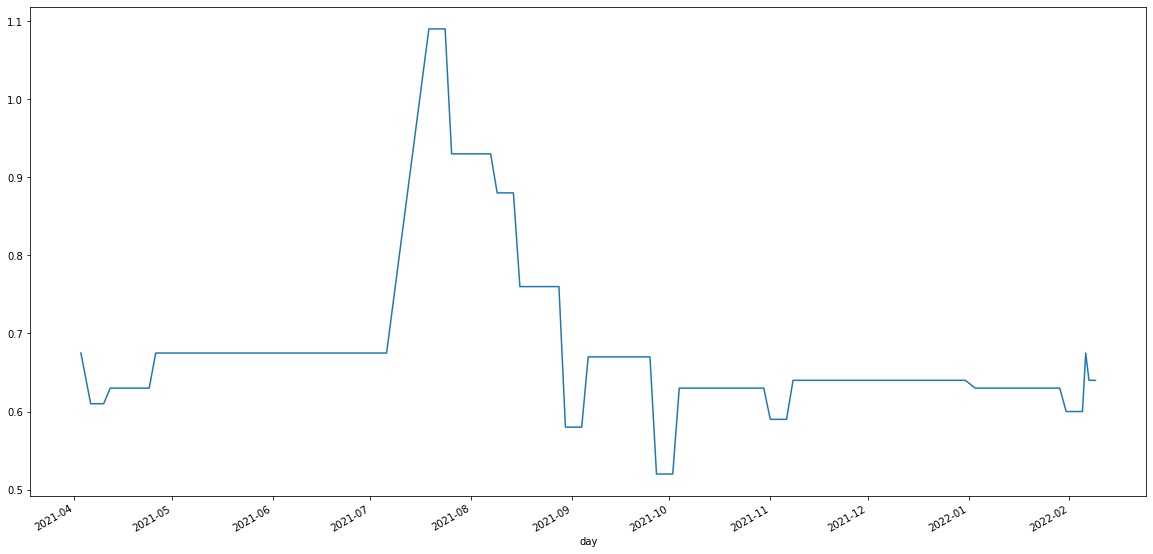

In [188]:
df[df['item_number'] == 80028349].purchase_price.plot()

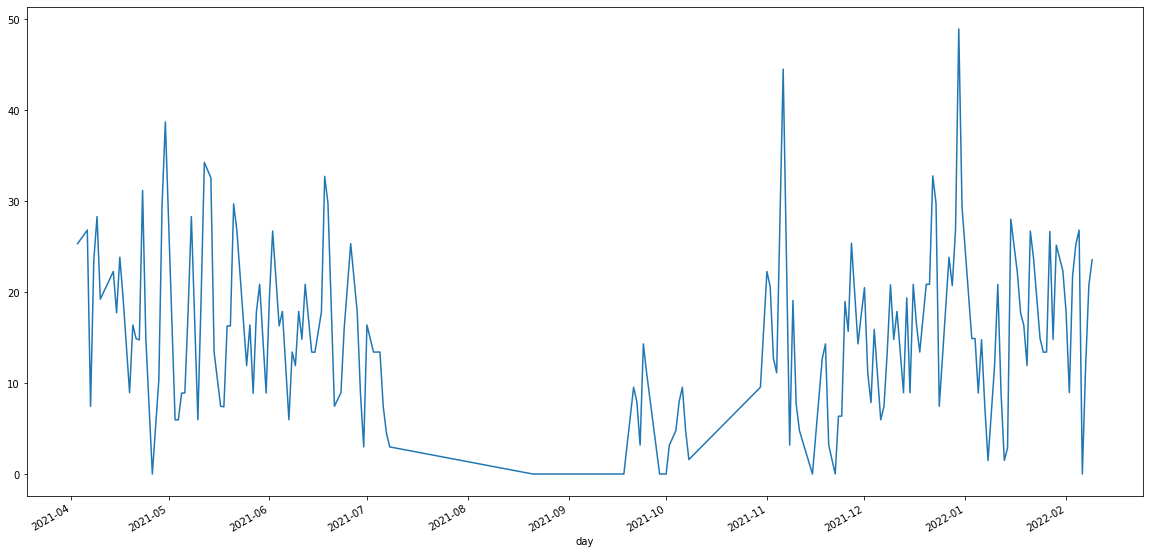

In [189]:
df[df['item_number'] == 80317483].revenue.plot()

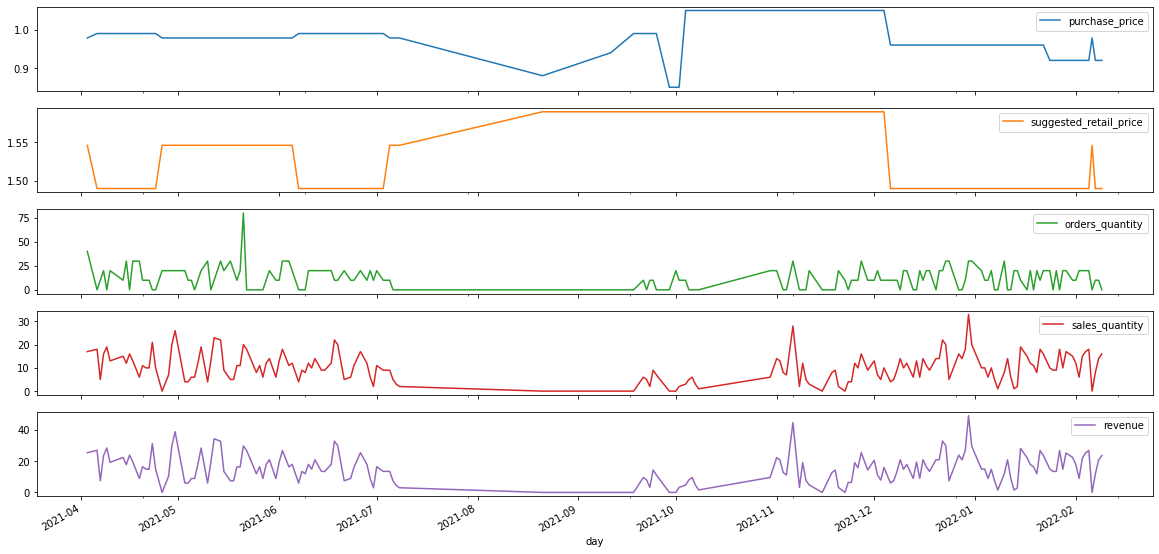

In [190]:
df1 = df[df['item_number'] == 80317483]
plot_cols = ['purchase_price', 'suggested_retail_price', 'orders_quantity','sales_quantity','revenue']
plot_features = df1[plot_cols]
_ = plot_features.plot(subplots=True)


In [191]:
df1 = df1.drop(columns = ['item_number','item_name'])
cols = df1.columns
train = df1[:int(0.8*(len(df1)))]
valid = df1[int(0.8*(len(df1))):]

In [192]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [193]:
model = VAR(endog=train)
model_fit = model.fit()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [194]:
prediction = model_fit.forecast(model_fit.y, steps=len(valid))


/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [196]:
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,5):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', np.sqrt(mean_squared_error(pred[i], valid[i])))

rmse value for purchase_price is :  0.0048443259057534185
rmse value for suggested_retail_price is :  0.03226403634269618
rmse value for orders_quantity is :  11.628953287603736
rmse value for sales_quantity is :  7.0538453919711905
rmse value for revenue is :  10.392935723005232
